In [7]:
import numpy as np

In [8]:
import pandas as pd
uber = pd.read_csv('uber.csv')
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
uber.shape

(200000, 9)

In [10]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [11]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Data Cleaning and EDA

In [12]:
#check for null values
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
##key and id not useful in for our purpose

In [13]:
uber_clean = uber.drop(['Unnamed: 0', 'key'],axis = 1)
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
uber_clean.dropna(axis =0, inplace = True)
#drop all the null values

In [15]:
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [16]:
uber_clean.isnull().sum()
#verfy it

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
# we have used thee haversine distance formula but any other formula can be used
def haversine (lon_1, lon_2, lat_1, lat_2): 
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [18]:
uber_clean['Distance']= haversine(uber_clean['pickup_longitude'],uber_clean['dropoff_longitude'],
                             uber_clean['pickup_latitude'],uber_clean['dropoff_latitude'])

uber_clean['Distance'] = uber_clean['Distance'].astype(float).round(2)

In [19]:
#New column added
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [20]:
#Target Variable (Fare_Amount) greatest coorelation with Distance
uber_clean.corr(method='pearson', numeric_only=True)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.024684
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.105581
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.062436
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.079944
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,-0.001472
Distance,0.024684,0.105581,-0.062436,0.056717,-0.079944,-0.001472,1.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

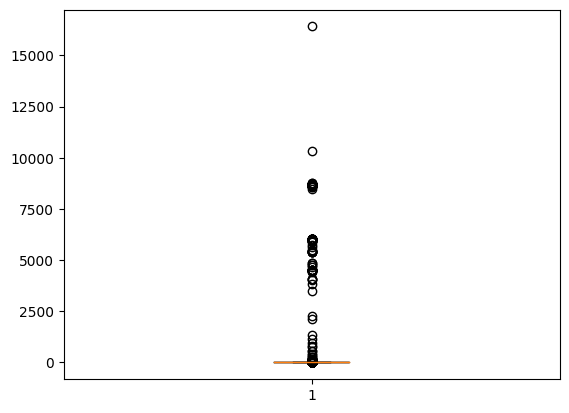

<Figure size 100x200 with 0 Axes>

In [22]:
ax1, ax = plt.subplots()
dis = uber_clean['Distance']
ax.boxplot(dis)
plt.figure(figsize=(1, 2))
plt.show()

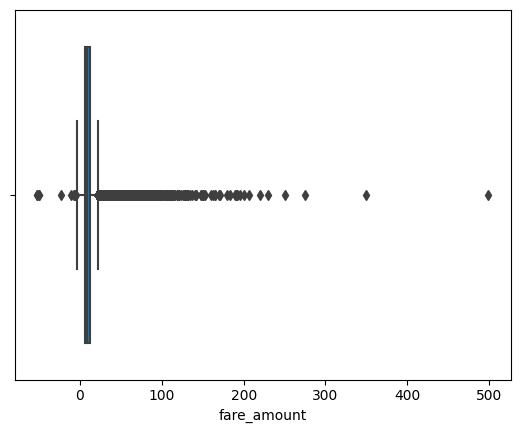

In [23]:
sns.boxplot(data=uber_clean, x='fare_amount')
plt.show()

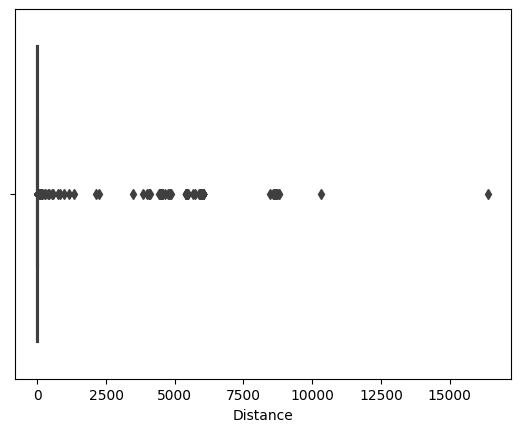

In [24]:
sns.boxplot(data=uber_clean, x='Distance')
plt.show()

Text(0, 0.5, 'fare_amount')

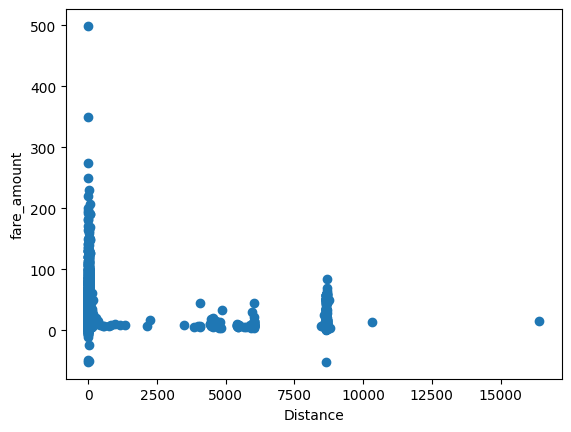

In [25]:
#scatter plot of distance vs fare
import matplotlib.pyplot as plt
plt.scatter(uber_clean['Distance'], uber_clean['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [34]:
#we must avoid the outliers(includes those with very large distances and with 0 distances or negative distances)
uber_clean.drop(uber_clean[uber_clean['Distance'] > 5].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] == 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] < 0].index, inplace = True)

uber_clean.drop(uber_clean[uber_clean['fare_amount'] == 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['fare_amount'] < 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] > 100].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['fare_amount'] > 16].index, inplace = True)
uber_clean.drop(uber_clean[(uber_clean['fare_amount']>100) & (uber_clean['Distance']<1)].index, inplace = True )
uber_clean.drop(uber_clean[(uber_clean['fare_amount']<100) & (uber_clean['Distance']>100)].index, inplace = True )

In [27]:
#Verify cleaning
uber_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157593 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        157593 non-null  float64
 1   pickup_datetime    157593 non-null  object 
 2   pickup_longitude   157593 non-null  float64
 3   pickup_latitude    157593 non-null  float64
 4   dropoff_longitude  157593 non-null  float64
 5   dropoff_latitude   157593 non-null  float64
 6   passenger_count    157593 non-null  int64  
 7   Distance           157593 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.8+ MB


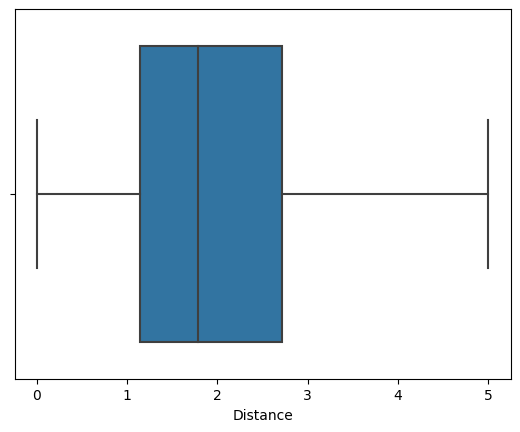

In [35]:
sns.boxplot(data=uber_clean, x='Distance')
plt.show()

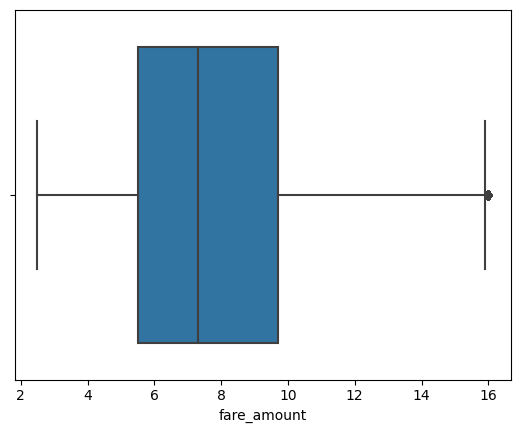

In [36]:
sns.boxplot(data=uber_clean, x='fare_amount')
plt.show()

Text(0, 0.5, 'fare_amount')

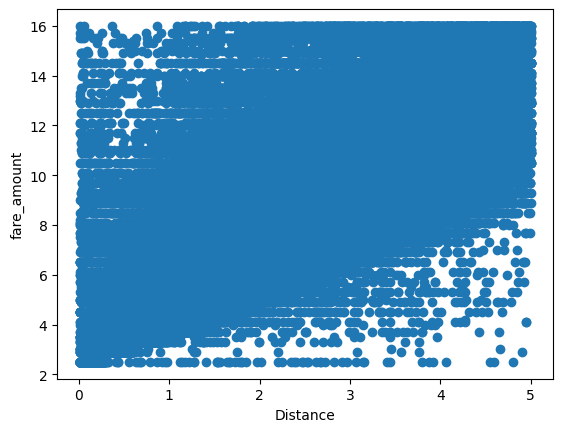

In [37]:
#if we re plot the scatter plot the change can be observed
plt.scatter(uber_clean['Distance'], uber_clean['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

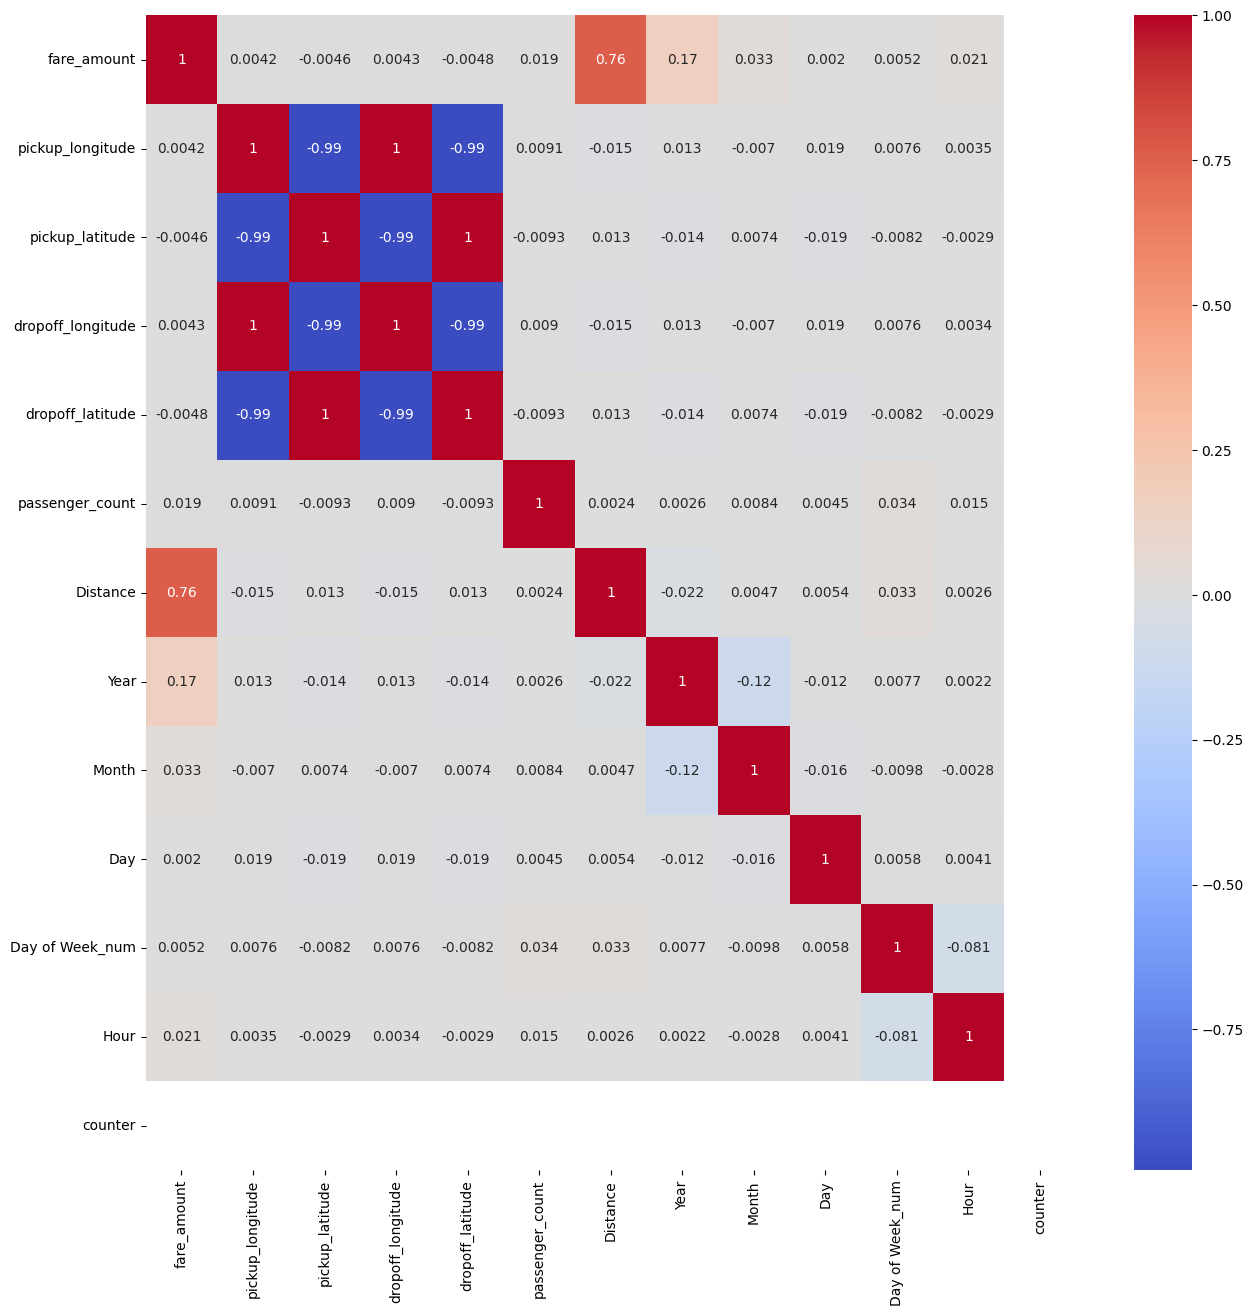

In [155]:
corr = uber_clean.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [39]:
#Date and time are simply seperated to extract more information from the data
uber_clean['pickup_datetime'] = pd.to_datetime(uber_clean['pickup_datetime'])

uber_clean['Year'] = uber_clean['pickup_datetime'].apply(lambda time: time.year)
uber_clean['Month'] = uber_clean['pickup_datetime'].apply(lambda time: time.month)
uber_clean['Day'] = uber_clean['pickup_datetime'].apply(lambda time: time.day)
uber_clean['Day of Week'] = uber_clean['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_clean['Day of Week_num'] = uber_clean['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_clean['Hour'] = uber_clean['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_clean['Day of Week'] = uber_clean['Day of Week'].map(day_map)

uber_clean['counter'] = 1

In [40]:
#seperate columns for pickup and dropoff for clear understanding of the data
uber_clean['pickup'] = uber_clean['pickup_latitude'].astype(str) + "," + uber_clean['pickup_longitude'].astype(str)   
uber_clean['drop off'] = uber_clean['dropoff_latitude'].astype(str) + "," + uber_clean['dropoff_longitude'].astype(str)

In [41]:
uber_clean.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.33,2012,2,17,Fri,4,9,1,"40.745767,-73.975187","40.743537,-74.00272"
9,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.89,2012,3,29,Thu,3,19,1,"40.741787,-74.001065","40.775012,-73.96304"
10,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2.25,2015,5,22,Fri,4,17,1,"40.74695205688477,-73.9743881225586","40.729804992675774,-73.98858642578125"
12,3.3,2011-05-17 14:03:00+00:00,-73.966378,40.804440,-73.965890,40.807133,5,0.30,2011,5,17,Tue,1,14,1,"40.80444,-73.966378","40.807133,-73.96589"
13,10.9,2011-06-25 11:19:00+00:00,-73.953352,40.767382,-73.972510,40.796137,1,3.58,2011,6,25,Sat,5,11,1,"40.767382,-73.953352","40.796137,-73.97251"
14,6.9,2010-04-06 22:20:27+00:00,-73.973370,40.755193,-73.978265,40.766375,1,1.31,2010,4,6,Tue,1,22,1,"40.755193,-73.97336999999999","40.766375,-73.97826500000001"


## Data Visualization

<BarContainer object of 7 artists>

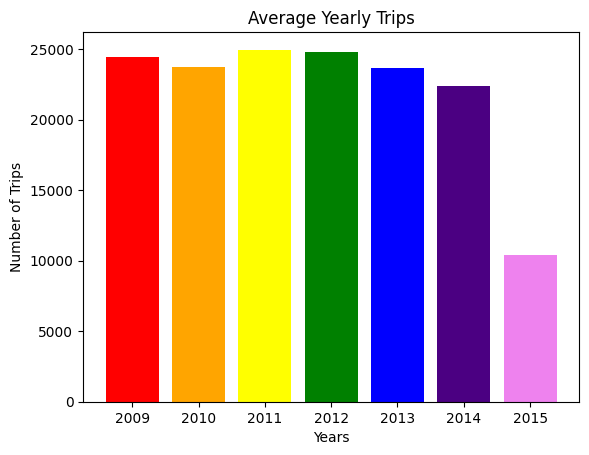

In [42]:
#needed to detect trends in the data to extract useful information for future predictions
trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for i in range(2009, 2016):
    x = uber_clean.loc[uber_clean['Year'] == i, 'counter'].sum()
    trips.append(x)

plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, trips, color=colors)

<BarContainer object of 12 artists>

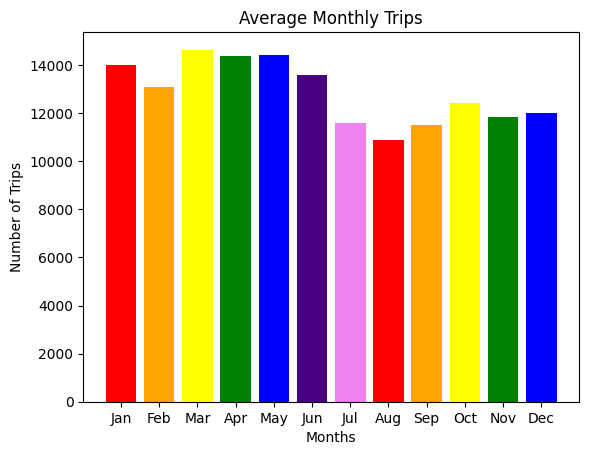

In [43]:
#monthly trips
trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']


for i in range(1, 13):
    x = uber_clean.loc[uber_clean['Month'] == i, 'counter'].sum()
    trips.append(x)


plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, trips, color=colors)

<BarContainer object of 7 artists>

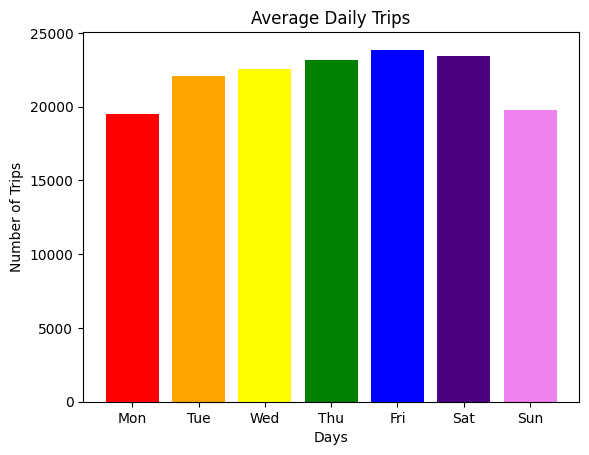

In [44]:
#Average Daily trips
trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']


for i in range(0, 7):
    x = uber_clean.loc[uber_clean['Day of Week_num'] == i, 'counter'].sum()
    trips.append(x)


plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, trips, color=colors)

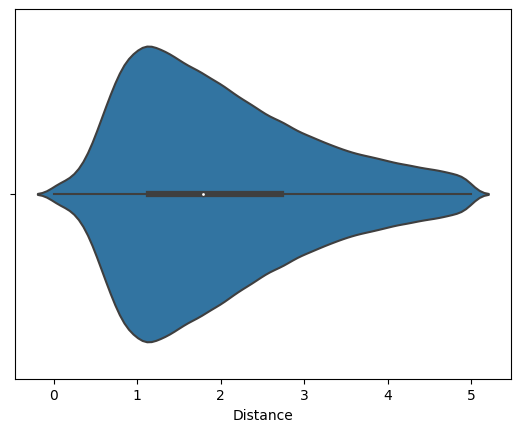

In [45]:
sns.violinplot(data=uber_clean, x='Distance')
plt.show()

<Axes: xlabel='fare_amount'>

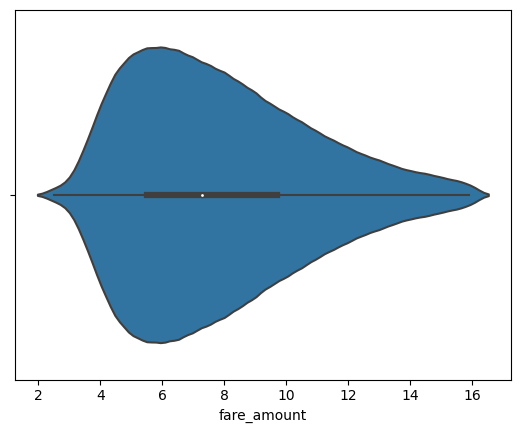

In [47]:
sns.violinplot(data=uber_clean, x='fare_amount')

<Axes: title={'center': 'No of trips vs Months'}, xlabel='January, 2009 - June, 2015', ylabel='No of Trips'>

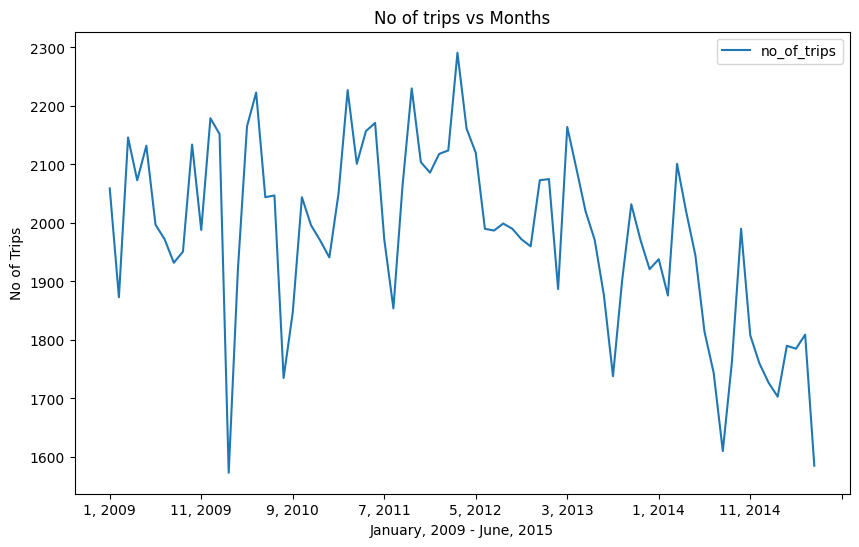

In [46]:
year_vs_trips = uber_clean.groupby(['Year','Month']).agg( 
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) +", "+ year_vs_trips['Year'].astype(str)


year_vs_trips = year_vs_trips.reset_index()

year_vs_trips.head()


year_vs_trips.plot(figsize= (10,6),kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

## **Model Training**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [108]:
#Seperate Test and Train set
X = uber_clean['Distance'].values
Y = uber_clean['fare_amount'].values

In [109]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [110]:
X.shape

(154311, 1)

In [126]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.12032396]
 [-0.0513673 ]
 [-0.87884717]
 ...
 [-1.67184871]
 [-0.12032396]
 [ 2.29315899]]
[[-0.30073541]
 [ 0.39828689]
 [-0.31865906]
 ...
 [-1.70774182]
 [-0.12149892]
 [ 1.36616391]]


### Test Train Split 

#### Linear Regression Model

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [114]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.58
Test set score: 0.5809569


In [115]:
print("Model Intercept: ", l_reg.intercept_[0])
print("Model Coeficient: ",round(l_reg.coef_[0][0],5))

Model Intercept:  8.971009490785464e-05
Model Coeficient:  0.76292


In [116]:
y_pred = l_reg.predict(X_test)

In [117]:
from sklearn import metrics
print('Coeficient of Determination:', round(r2_score(y_test, y_pred),5))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('Mean Absolute % Error:', round(metrics.mean_absolute_percentage_error(y_test, y_pred),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

Coeficient of Determination: 0.58096
Mean Absolute Error: 0.48507
Mean Absolute % Error: 1.24306
Mean Squared Error: 0.41776
Root Mean Squared Error: 0.64634


#### Ensamble Regression Model

In [142]:
base_model = LinearRegression()
ada_boost = AdaBoostRegressor(estimator = base_model, n_estimators=450, learning_rate=0.8, loss='square')

In [143]:
ada_boost.fit(X_train, y_train)

D:\Faizan Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=LinearRegression(), learning_rate=0.8,
                  loss='square', n_estimators=450)

In [144]:
y_pred = ada_boost.predict(X_test)

In [145]:
print('Coeficient of Determination:', round(r2_score(y_test, y_pred),5))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('Mean Absolute % Error:', round(metrics.mean_absolute_percentage_error(y_test, y_pred),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

Coeficient of Determination: 0.57041
Mean Absolute Error: 0.51091
Mean Absolute % Error: 1.22422
Mean Squared Error: 0.42827
Root Mean Squared Error: 0.65443


### KFold Cross Validation

#### Linear Regression Model

In [146]:
# Model training using KFOLD Cross Validation 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
accuracy_list = []
mse_list = []

In [147]:
#Learning Loop
kf = KFold(n_splits = 10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(x_std):
    x_train, x_test = x_std[train_index], x_std[test_index]
    y_train, y_test = y_std[train_index], y_std[test_index]
    
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    
    accuracy_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
     

In [148]:
#Gradient and Y-intercept
m = lr_model.coef_[0][0]
c = lr_model.intercept_[0]

print("Model Coeficient: {}".format(round(m,3)))
print("Model Intercept: {}".format(c))

Model Coeficient: 0.763
Model Intercept: -6.087268245343164e-05


In [149]:
#Average accuracy and Mean Square Error
avg_score = np.array(accuracy_list).mean()
avg_error = np.array(mse_list).mean()
print("Averge Coeficient of Determination: {}".format(round(avg_score,3)))
print("Average Mean Square Error: {}".format(round(avg_error,3)))


Averge Coeficient of Determination: 0.582
Average Mean Square Error: 0.418


#### Ensamble Regression Model

In [150]:
base_model = LinearRegression()
ada_boost = AdaBoostRegressor(estimator = base_model, n_estimators=450, learning_rate=0.8, loss='square')
accuracy_list = []
mse_list = []

In [151]:
kf = KFold(n_splits = 10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(x_std):
    x_train, x_test = x_std[train_index], x_std[test_index]
    y_train, y_test = y_std[train_index], y_std[test_index]
    
    ada_boost.fit(x_train, y_train)
    y_pred = ada_boost.predict(x_test)
    
    accuracy_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
     

D:\Faizan Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Faizan Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Faizan Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Faizan Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [152]:
avg_score = np.array(accuracy_list).mean()
avg_error = np.array(mse_list).mean()
print("Average Coeficient of Determination: {}".format(round(avg_score,3)))
print("Average Mean Square Error: {}".format(round(avg_error,3)))

Average Coeficient of Determination: 0.571
Average Mean Square Error: 0.429
